In [1]:
import pandas as pd

In [2]:
df_reviews = pd.read_csv('IMDB Dataset.csv')

In [3]:
df_positive = df_reviews[df_reviews['sentiment'] == 'positive'][:9000]
df_negative = df_reviews[df_reviews['sentiment'] == 'negative'][:1000]

In [4]:
df_reviews_imb = pd.concat([df_positive,df_negative])

In [5]:
df_reviews_imb

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [6]:
df_reviews_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

# Dealing with imbalance data

<Axes: xlabel='sentiment'>

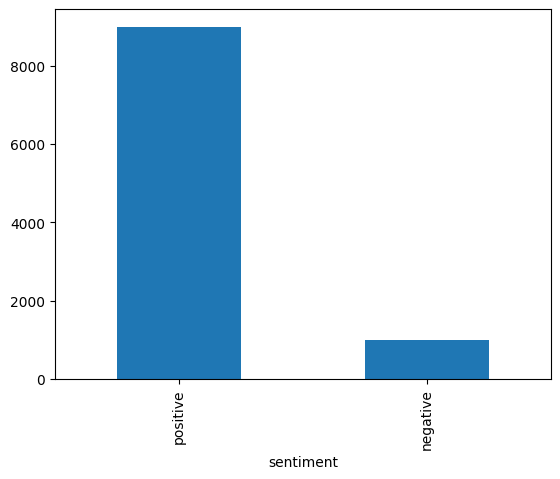

In [7]:
df_reviews_imb.value_counts('sentiment').plot(kind='bar')

In [8]:
#Under sample
# using sample method
length_negative = len(df_reviews_imb[df_reviews_imb['sentiment'] == 'negative'])
length_negative

1000

In [9]:
df_reviews_positive = df_reviews_imb[df_reviews_imb['sentiment'] == 'positive'].sample(length_negative)

In [10]:
df_reviews_negative = df_reviews_imb[df_reviews_imb['sentiment'] == 'negative']

In [11]:
df_reviews_bal = pd.concat([df_reviews_positive,df_reviews_negative])

In [12]:
df_reviews_bal.reset_index(drop=True,inplace=True)

In [13]:
df_reviews_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

## Balancing data with RandomUnderSampler

In [20]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
df_review_bal,df_review_bal['sentiment'] = rus.fit_resample(df_reviews_imb[['review']],df_reviews_imb['sentiment'])

In [22]:
df_review_bal

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
10833,Knute Rockne led an extraordinary life and his...,positive
1039,At the height of the 'Celebrity Big Brother' r...,positive
5255,This is another of Robert Altman's underrated ...,positive
12237,This movie won a special award at Cannes for i...,positive


In [23]:
df_review_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64